# K-Fold Cross Validation on CIFAR-10 Dataset
#### Step by step implementation

In [13]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

### Loading Images and Defining Different Classes of the Dataset

In [4]:
TRAIN_DIR = 'D:/Spring 2022-23 9th sem/Computer Vision and Pattern Recognition/DownloadDataset/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Loading Colourful Training Data of 10 Different Classes

In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:53<00:00, 93.98it/s] 

50000


### Visualization of 50 Random Data Taking From 10 Different Classes 
* Using random.shuffle method to get all categorical data

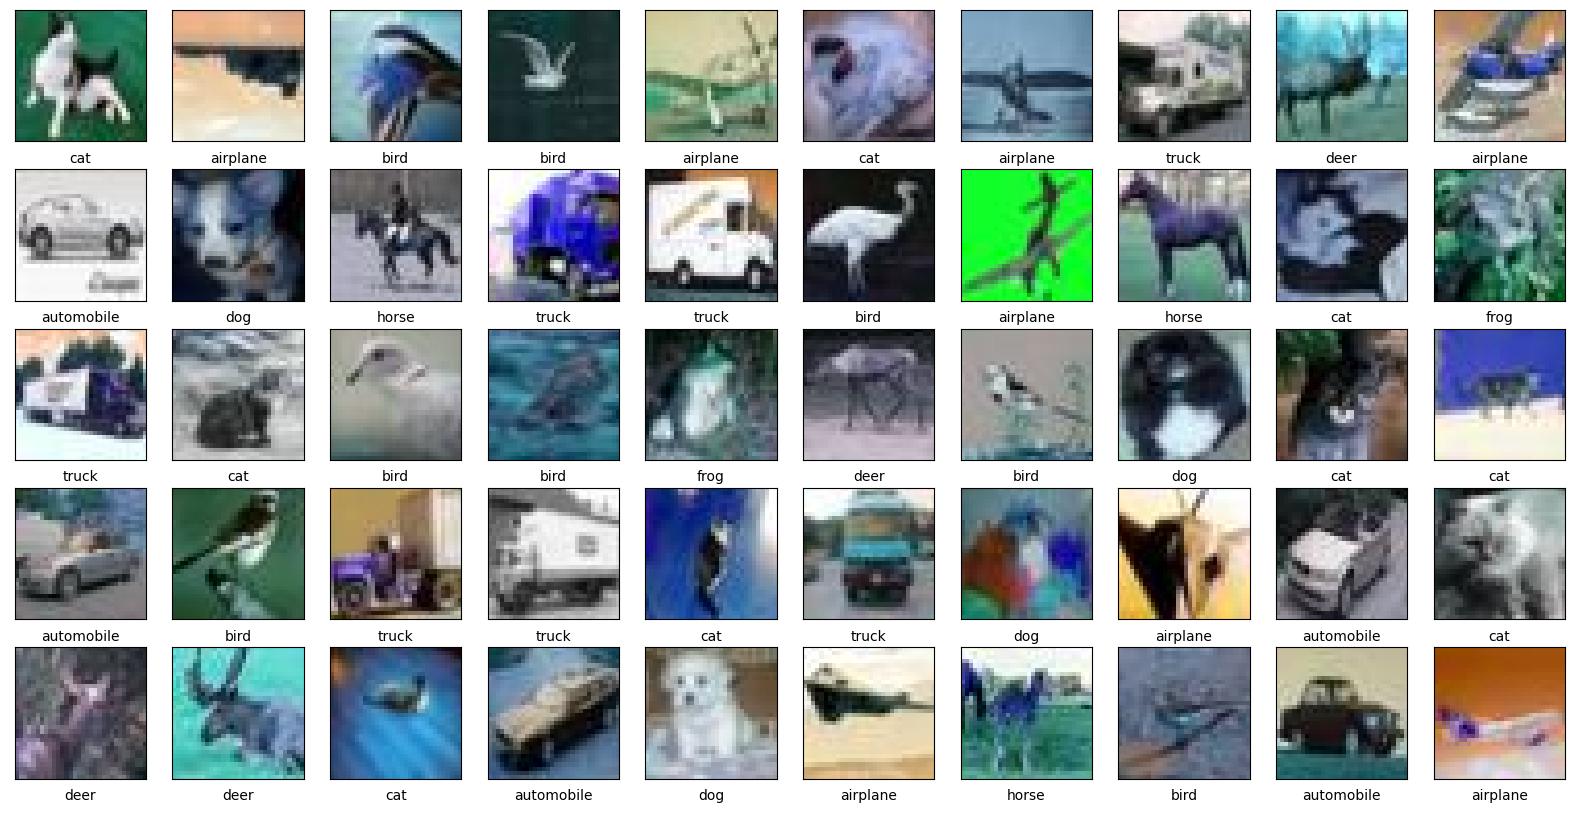

In [6]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

### Dividing Training Images into 5 Folds

In [7]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

### NearestNeighbour Class Definition and L2 distance Calculation

In [8]:
class NearestNeighbour:
    
    def __init__(self,k,distancemetric="l2"):
        self.K = k
        self.trainSet = None
        self.distanceMetric = distancemetric.lower()
        
    def fit(self,train):
        self.trainSet = train

    def __L2_distance(self, train_img,test_img):
        temp = train_img - test_img
        dis = np.sqrt(np.sum(np.square(temp)))
        return dis
    
    def __distanceCalculator(self,validate):
        accuracy = 0
        for vidx in range(len(validate)):
            distnaceList = []
            cnt = 0
            for tidx in range(len(self.trainSet)):
                d = 0
                if self.distanceMetric == 'l2':
                    d = self.__L2_distance(self.trainSet[tidx][0],validate[vidx][0])
                distnaceList.append((d,self.trainSet[tidx][1]))
            distnaceList.sort(key=(lambda a: a[0]))
            labels = [v[1] for v in distnaceList[:self.K]]
            label = max(set(labels), key = labels.count)
            
            if label == validate[vidx][1]:
                cnt+=1
            
            accuracy += cnt
            
        return accuracy, (accuracy/len(validate))
    
    def predict(self,validate):
        return self.__distanceCalculator(validate)

### K vs Accuracy Graph Plotting 

In [9]:
def plot_Accuracies(fold,k_choices,accuracies):
    best = [0,0]
    for k in k_choices:
        accu = accuracies[k]
        if best[1]< max(accu):
            best[0]=k
            best[1]=max(accu)
        plt.scatter([k] * len(accu), accu)

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

### Points for K Values

In [10]:
k_choices = [2, 5, 9, 11, 15, 17, 20]

### For 5 Folds Training and Validating Data in a Random Order

In [11]:
accuracis = {}
nfolds = 5
# creating the dictonary of k with empty list
for k in k_choices:
    accuracis[k]=[]
    
for i in range(nfolds):
    if i==0:
        trainSet = f1+f2+f3+f4
        validate = f0            
    elif i==1:
        trainSet = f0+f2+f3+f4
        validate = f1
    elif i==2:
        trainSet = f1+f0+f3+f4
        validate = f2
    elif i==3:
        trainSet = f1+f2+f0+f4
        validate = f3
    elif i==4:
        trainSet = f1+f2+f3+f0
        validate = f4

    for k in k_choices:

        classifier = NearestNeighbour(k,'l2')
        classifier.fit(trainSet)
        cnt, acc = classifier.predict(validate)

        accuracis[k].append(acc)

### Plotted Graph for KNN

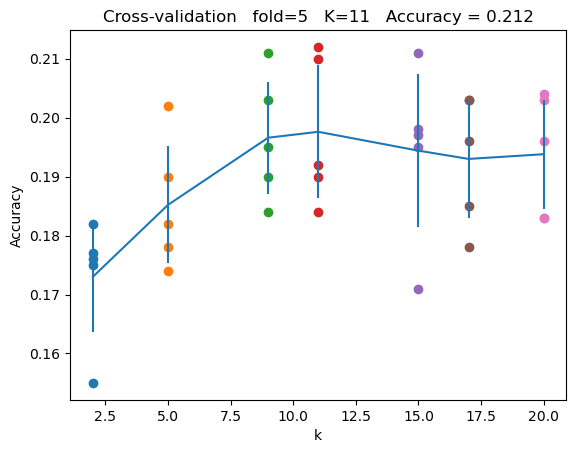

In [12]:
plot_Accuracies(5,k_choices,accuracis)

#### The plotted graph has been generated after full training and validation on the CIFAR-10 dataset. The full combination has been done to 60,000 32x32 color images.

#### Here the X axis indicates the K values and the Y axis indicates the accuracy level. K values have been chosen up to 20 here. From the graph, it is visualized that the most accurate level has come from the 'K' position of 11 and the accuracy is 0.212.

#### By doing this cross-validation on the CIFAR-10 dataset, random accuracy will be achieved as the combination of images is randomly changing but the accuracy deviation of each cross-validation will appear close to each other.